In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import mysql.connector
from faker import Faker

from mysql.connector import Error
from mysql.connector.pooling import MySQLConnectionPool

In [2]:
# df = pd.read_csv(".\data\Sales_January_2019.csv")
# df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [5]:

# Especifica o caminho para a pasta que contém os arquivos CSV
caminho_pasta = '.\data\projeto dados'

# Usando glob para encontrar todos os arquivos CSV na pasta
arquivos_csv = glob.glob(caminho_pasta + '.csv')

# Inicializa um DataFrame vazio para armazenar os dados combinados
arquivos_csv = [arquivo for arquivo in os.listdir(caminho_pasta) if arquivo.endswith(".csv")]

# Inicialize um DataFrame vazio para armazenar os dados combinados
df = pd.DataFrame()

# Loop através dos arquivos CSV e combine-os no DataFrame
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(caminho_pasta, arquivo)
    df_temporario = pd.read_csv(caminho_arquivo)
    df = pd.concat([df, df_temporario], ignore_index=True)

# Salve o DataFrame combinado em um novo arquivo CSV
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [6]:
df.shape
# df.describe()

(186850, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:

df = df.sort_values(by='Order Date')
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
76054,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
68056,141732,iPhone,1,700,01/01/19 06:13,"446 Pine St, Atlanta, GA 30301"
76348,149620,Lightning Charging Cable,1,14.95,01/01/19 06:34,"338 Chestnut St, San Francisco, CA 94016"
68826,142451,AAA Batteries (4-pack),1,2.99,01/01/19 06:41,"232 12th St, Boston, MA 02215"
72609,146039,34in Ultrawide Monitor,1,379.99,01/01/19 07:24,"53 River St, San Francisco, CA 94016"
69934,143498,AA Batteries (4-pack),3,3.84,01/01/19 07:26,"428 Highland St, New York City, NY 10001"


In [11]:
quantidade_nan = df['Order ID'].isna().sum()
quantidade_nan

0

In [10]:
df = df.dropna(how='all')

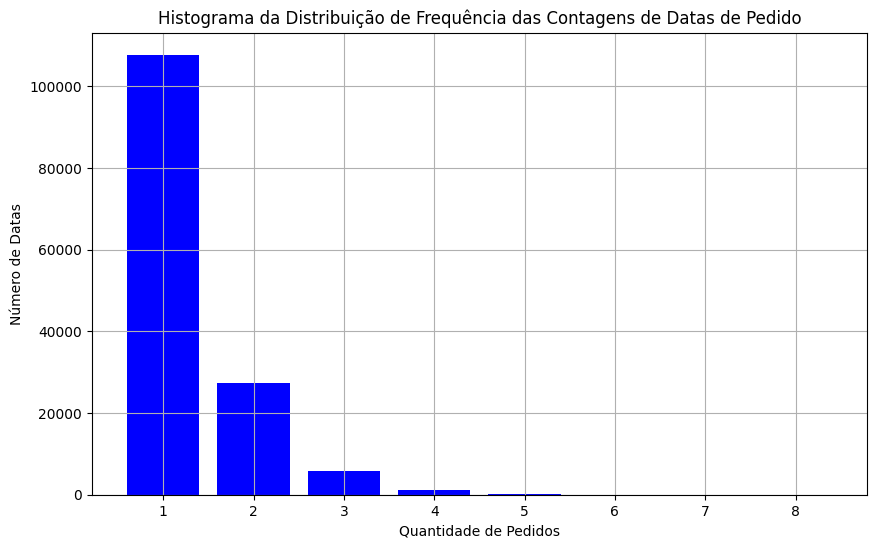

In [12]:
freq = df["Order Date"].value_counts()
max_freq = freq.max()
freq = freq[freq != max_freq]
order_date = freq.value_counts()
order_date
plt.figure(figsize=(10, 6))
plt.bar(order_date.index, order_date.values, color='blue')
plt.xlabel('Quantidade de Pedidos')
plt.ylabel('Número de Datas')
plt.title('Histograma da Distribuição de Frequência das Contagens de Datas de Pedido')
plt.grid(True)
plt.show()


In [13]:
# compras com mesma data e mesmo endereço indicam mesmo cliente
duplicated_dates = df[df.duplicated(['Order Date', 'Purchase Address'], keep=False)]
duplicated_dates.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
71311,144804,Wired Headphones,1,11.99,01/01/19 07:29,"628 Lake St, New York City, NY 10001"
71310,144804,iPhone,1,700,01/01/19 07:29,"628 Lake St, New York City, NY 10001"
74737,148074,USB-C Charging Cable,1,11.95,01/01/19 11:25,"6 Johnson St, Atlanta, GA 30301"
74736,148074,Google Phone,1,600,01/01/19 11:25,"6 Johnson St, Atlanta, GA 30301"
75124,148450,Lightning Charging Cable,1,14.95,01/01/19 12:02,"761 Lakeview St, Dallas, TX 75001"
75123,148450,iPhone,1,700,01/01/19 12:02,"761 Lakeview St, Dallas, TX 75001"
71176,144679,Google Phone,1,600,01/01/19 12:51,"984 Lakeview St, San Francisco, CA 94016"
71177,144679,USB-C Charging Cable,1,11.95,01/01/19 12:51,"984 Lakeview St, San Francisco, CA 94016"
74084,147451,Google Phone,1,600,01/01/19 12:57,"229 Elm St, New York City, NY 10001"
74085,147451,Wired Headphones,1,11.99,01/01/19 12:57,"229 Elm St, New York City, NY 10001"


In [15]:
unique_addresses = df['Purchase Address'].drop_duplicates()
unique_addresses.values 

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '60 Hickory St, Los Angeles, CA 90001',
       '425 Lake St, Portland, OR 97035', 'Purchase Address'],
      dtype=object)

In [35]:
def conecta_db():
    conn = mysql.connector.connect(
        host="aws.connect.psdb.cloud",
        database="analises",
        user="aw2eivla0dajfhj3ffzo",
        password="pscale_pw_SMCEyWC6IuAozcHGfE4WilDcyHw8eFMaLsLI4Vqtccq"

    )
    return conn


# Insert global
def inserir_dados(sql, values):
    con = conecta_db()
    cur = con.cursor()
    cur.execute(sql, values)
    con.commit()
    con.close()

fake = Faker()

def inserir_dados_cli(enderecos):
    sql = "INSERT INTO Clientes (CPF, NomeCliente, Endereco, Email) VALUES (%s, %s, %s, %s)"

    for endereco in enderecos:
        cpf = str(fake.random_int(min=10000000000, max=99999999999))
        nome_cliente = fake.name()
        email = fake.email()
        values = (cpf, nome_cliente, endereco, email)

        inserir_dados(sql, values)
        
inserir_dados_cli(unique_addresses.values)


ProgrammingError: Not all parameters were used in the SQL statement

In [36]:
def insert_client_data2(enderecos):
    sql = "INSERT INTO Clientes (CPF, NomeCliente, Endereco, Email) VALUES (%s, %s, %s, %s)"

    try:
        connection = connect_to_db()
        if connection:
            cursor = connection.cursor()
            data_to_insert = []
            for endereco in enderecos:
                cpf = str(fake.random_int(min=10000000000, max=99999999999))
                nome_cliente = fake.name()
                email = fake.email()
                data_to_insert.append((cpf, nome_cliente, endereco, email))
            cursor.executemany(sql, data_to_insert)
            connection.commit()
    except Error as e:
        print("Error:", e)
    finally:
        if connection:
            connection.close()

# Assuming unique_addresses is a list of addresses
insert_client_data2(unique_addresses)


Error: 1105 (HY000): unavailable: unexpected EOF


DatabaseError: 1105 (HY000): unavailable: dial tcp 10.207.107.229:15999: connect: connection refused

In [28]:
unique_addresses.values[81]

140788

In [63]:
df.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [ ]:
df.Product.value_counts(normalize=True)

sex
1    0.683168
0    0.316832
Name: proportion, dtype: float64

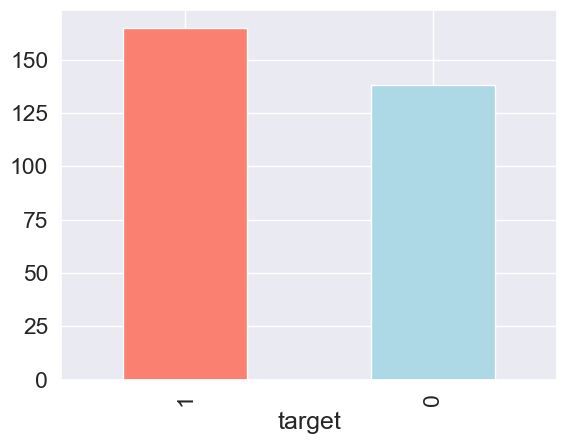

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


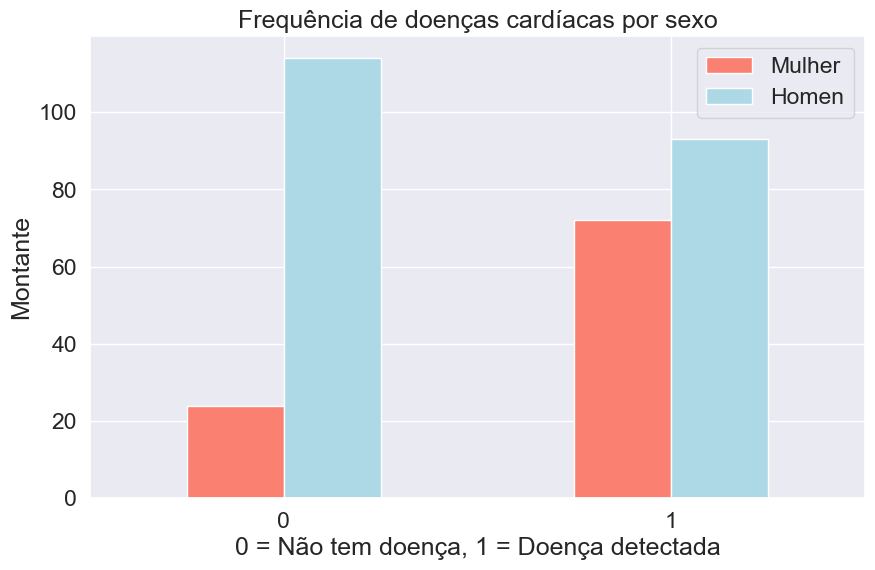

In [ ]:
# Criando o plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Adicionando atributos
plt.title("Frequência de doenças cardíacas por sexo")
plt.xlabel("0 = Não tem doença, 1 = Doença detectada")
plt.ylabel("Montante")
plt.legend(["Mulher", "Homen"])
plt.xticks(rotation=0); # configura os eixos dos labels para vertical

Text(0.5, 1.0, 'Distribuição de Idades')

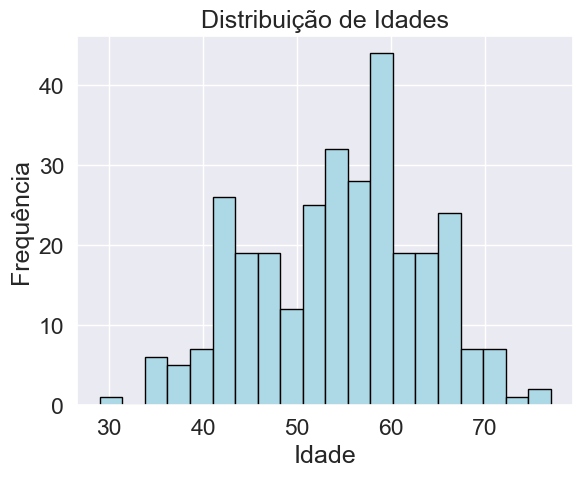

In [ ]:
plt.hist(df["age"], bins=20, color="lightblue", edgecolor="black")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição de Idades")

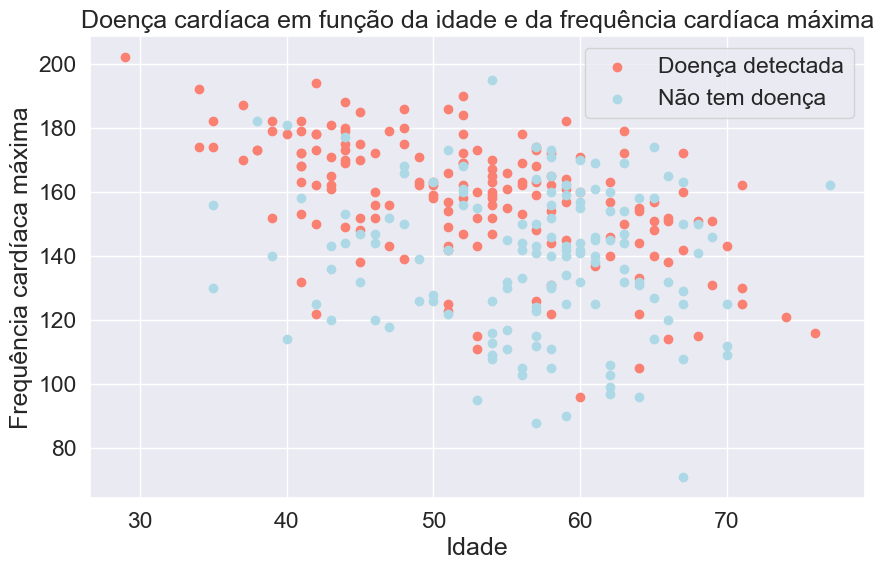

In [ ]:
plt.figure(figsize=(10,6))

# # Plot para valores positivos
plt.scatter(df["age"][df["target"] ==1 ], 
            df["thalach"][df["target"] == 1], 
            c="salmon")

# # Plot para valores negativos
# # queremos plotar no mesmo gráfico então não vamos configurar axes diferentes
plt.scatter(df["age"][df["target"] == 0], 
            df["thalach"][df["target"] == 0], 
            c="lightblue")

# # Atributos
plt.title("Doença cardíaca em função da idade e da frequência cardíaca máxima")
plt.xlabel("Idade")
plt.legend(["Doença detectada", "Não tem doença"])
plt.ylabel("Frequência cardíaca máxima");

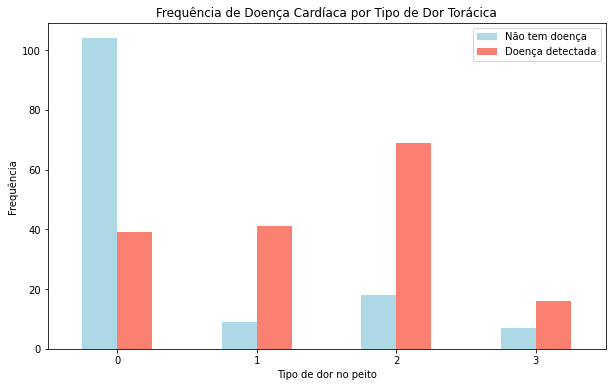

In [ ]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Adicionando atributos ao gráfico
plt.title("Frequência de Doença Cardíaca por Tipo de Dor Torácica")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])
plt.xticks(rotation = 0);

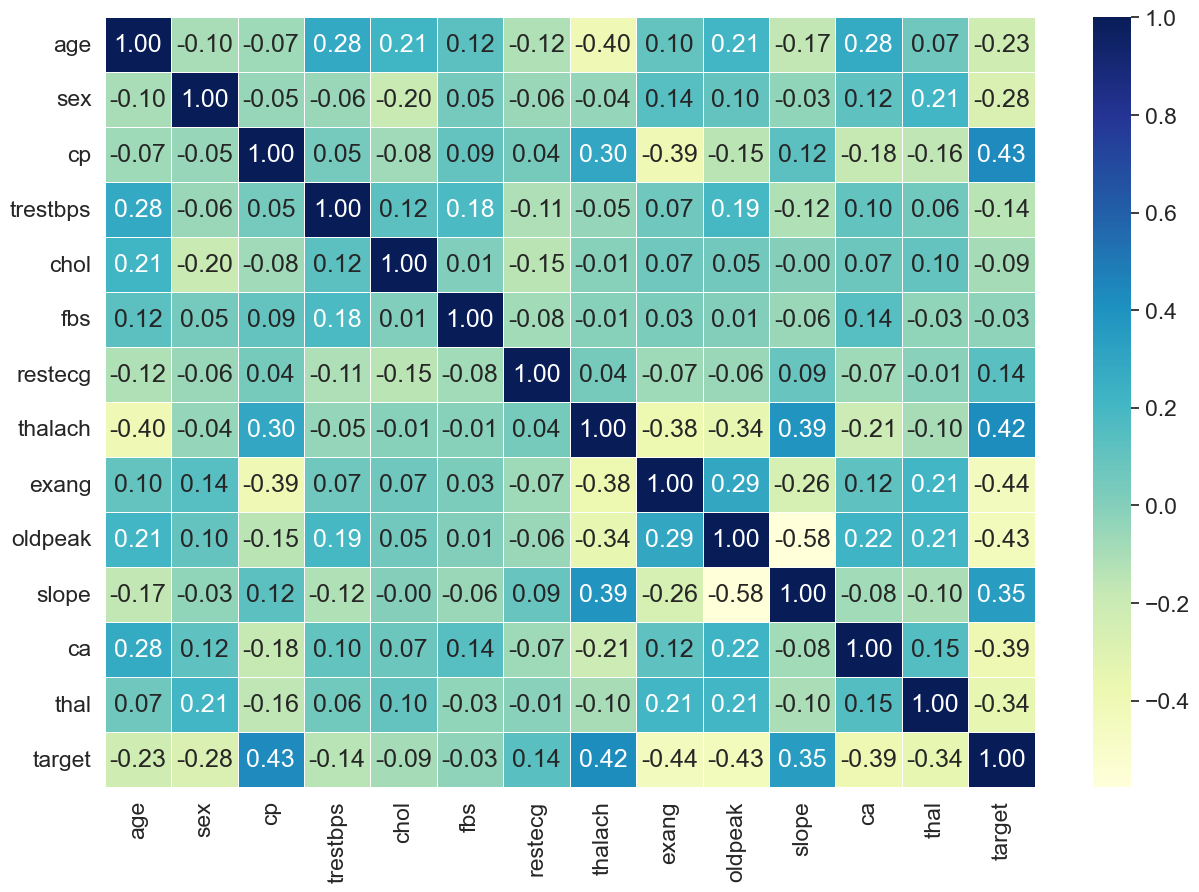

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");



In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {"KNN": KNeighborsClassifier(),
           "Logistc Regression": LogisticRegression(max_iter=1000),
           "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistc Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [ ]:
# Lista para armazenar o score de treino
train_scores = []

# Lista para armazenar o score de teste
test_scores = []

# Lista com diferentes valores para "n_neighbors"
# vamos começar com 1 e subir até 20
neighbors = range(1, 21)

# Instanciando o KNN
knn = KNeighborsClassifier()

# Loop para aplicar os diferentes valores em "n_neighbors"
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Treina o modelo
    knn.fit(X_train, y_train)
    
    # Guarda o score de treino
    train_scores.append(knn.score(X_train, y_train))
    
    # Armazena o score de teste
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Desempenho máximo de KNN nos dados de teste: 75.41%


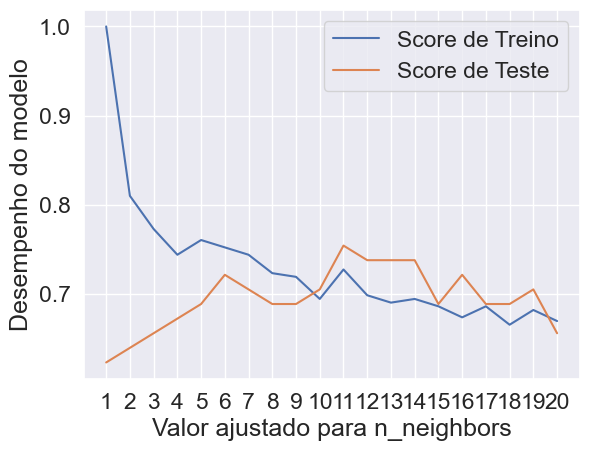

In [ ]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

In [ ]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Import
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
y_preds = gs_log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


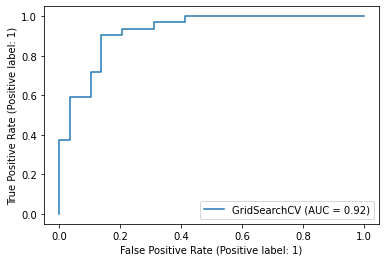

In [ ]:
# Import ROC Curve
from sklearn.metrics import plot_roc_curve

# Plot ROC Curve e calcula a métrica
plot_roc_curve(gs_log_reg, X_test, y_test);

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_preds))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("rótulos verdadeiros")
    plt.ylabel("rótulos previstos")
    
plot_conf_mat(y_test, y_preds)

NameError: name 'y_test' is not defined

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Importa cross_val_score
from sklearn.model_selection import cross_val_score

# Passando o melhor modelo com os melhores hiperparâmetros
# que encontramos com (GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [ ]:
# Cross-validated (validação cruzada)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [ ]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="precision"))

cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring="recall"))

cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1"))

cv_precision, cv_recall, cv_f1

(0.8215873015873015, 0.9272727272727274, 0.8705403543192143)

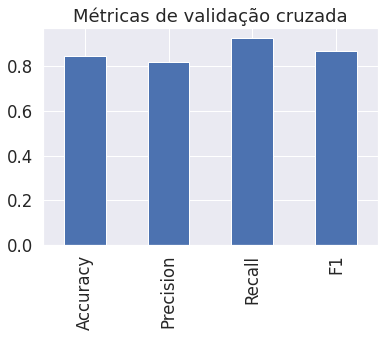

In [ ]:
# Plot cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Métricas de validação cruzada", legend=False);

In [ ]:
clf.fit(X_train, y_train);
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [ ]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'ca': -0.6516534770577476,
 'chol': -0.0017036439067759743,
 'cp': 0.6747282587404362,
 'exang': -0.6312040612837573,
 'fbs': 0.047876881148997324,
 'oldpeak': -0.5759095045469952,
 'restecg': 0.3349019815885189,
 'sex': -0.9042409028785717,
 'slope': 0.4709514073081419,
 'thal': -0.6998420764664995,
 'thalach': 0.02472938284108309,
 'trestbps': -0.011613401339975146}

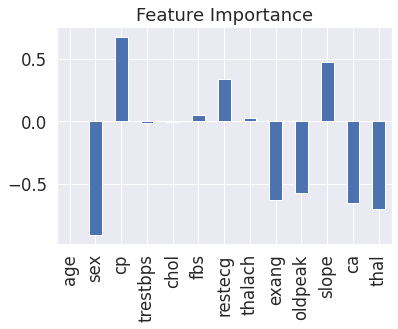

In [ ]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
